In [1]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import time,sys,os
from sklearn.cluster import KMeans, MeanShift

prod = '6mo' # 6mo weeklyくらいがいいかも
dys = 180
dates = '2020-12-14' # 直近のDL日

today = datetime.date.today()
last = today +datetime.timedelta(days=-dys)
last = pd.to_datetime(last)

os.makedirs('./csv/'+str(today),exist_ok = True)

In [2]:
TP = pd.read_csv('./csv/TOPIX_small1/TOPIX_small1.csv')
data =pd.DataFrame(TP)
stocks = [str(s)+".T" for s in data.code]
stocks.append("^N225")
tickers = yf.Tickers(" ".join(stocks))

In [3]:
'''終値　毎日変わる'''
closes   = [] # 終値

for i in range(len(tickers.tickers)):
    start = time.time()
    closes.append(tickers.tickers[i].history(period=prod).Close)
    t = time.time() - start
    print(tickers.tickers[i],t)

closes = pd.DataFrame(closes).T   # DataFrame化
closes.columns = stocks           # カラム名の設定
closes = closes.ffill()           # 欠損データの補完
closes.to_csv('./csv/'+str(today)+'/closes_'+ str(today)+'_'+prod+'_small498.csv')

yfinance.Ticker object <1377.T> 0.2792317867279053
yfinance.Ticker object <1379.T> 0.16434550285339355
yfinance.Ticker object <1414.T> 0.17659687995910645
yfinance.Ticker object <1417.T> 0.15618252754211426
yfinance.Ticker object <1419.T> 0.15053272247314453
yfinance.Ticker object <1662.T> 0.15031218528747559
yfinance.Ticker object <1719.T> 0.15923619270324707
yfinance.Ticker object <1720.T> 0.15712428092956543
yfinance.Ticker object <1766.T> 0.16122031211853027
yfinance.Ticker object <1805.T> 0.15377259254455566
yfinance.Ticker object <1815.T> 0.1682603359222412
yfinance.Ticker object <1822.T> 0.1973419189453125
yfinance.Ticker object <1835.T> 0.17717289924621582
yfinance.Ticker object <1852.T> 0.18421077728271484
yfinance.Ticker object <1861.T> 0.14223003387451172
yfinance.Ticker object <1881.T> 0.17155075073242188
yfinance.Ticker object <1885.T> 0.17015647888183594
yfinance.Ticker object <1890.T> 0.18007183074951172
yfinance.Ticker object <1926.T> 0.15081143379211426
yfinance.Ticker

yfinance.Ticker object <4626.T> 0.17200088500976562
yfinance.Ticker object <4633.T> 0.17956852912902832
yfinance.Ticker object <4634.T> 0.1684417724609375
yfinance.Ticker object <4641.T> 0.16436433792114258
yfinance.Ticker object <4668.T> 0.1625523567199707
yfinance.Ticker object <4680.T> 0.15368032455444336
yfinance.Ticker object <4686.T> 0.32411909103393555
yfinance.Ticker object <4694.T> 0.16548871994018555
yfinance.Ticker object <4708.T> 0.16072463989257812
yfinance.Ticker object <4714.T> 0.18487048149108887
yfinance.Ticker object <4733.T> 0.16806769371032715
yfinance.Ticker object <4743.T> 0.16494107246398926
yfinance.Ticker object <4812.T> 0.15651869773864746
yfinance.Ticker object <4819.T> 0.16309213638305664
yfinance.Ticker object <4848.T> 0.16853642463684082
yfinance.Ticker object <4849.T> 0.18050622940063477
yfinance.Ticker object <4917.T> 0.16830873489379883
yfinance.Ticker object <4919.T> 0.15986371040344238
yfinance.Ticker object <4928.T> 0.15971922874450684
yfinance.Ticke

yfinance.Ticker object <7222.T> 0.19086074829101562
yfinance.Ticker object <7224.T> 0.2537860870361328
yfinance.Ticker object <7226.T> 0.16356968879699707
yfinance.Ticker object <7230.T> 0.1583704948425293
yfinance.Ticker object <7231.T> 0.17343878746032715
yfinance.Ticker object <7239.T> 0.1671280860900879
yfinance.Ticker object <7241.T> 0.1802067756652832
yfinance.Ticker object <7242.T> 0.1692967414855957
yfinance.Ticker object <7244.T> 0.16199827194213867
yfinance.Ticker object <7246.T> 0.17319583892822266
yfinance.Ticker object <7250.T> 0.1679365634918213
yfinance.Ticker object <7251.T> 0.2730679512023926
yfinance.Ticker object <7274.T> 0.16409063339233398
yfinance.Ticker object <7278.T> 0.1761622428894043
yfinance.Ticker object <7294.T> 0.1717982292175293
yfinance.Ticker object <7296.T> 0.161973237991333
yfinance.Ticker object <7321.T> 0.15316534042358398
yfinance.Ticker object <7419.T> 0.16817021369934082
yfinance.Ticker object <7476.T> 0.1615915298461914
yfinance.Ticker object <

yfinance.Ticker object <9749.T> 0.17256617546081543
yfinance.Ticker object <9757.T> 0.15907764434814453
yfinance.Ticker object <9759.T> 0.16008329391479492
yfinance.Ticker object <9787.T> 0.1685807704925537
yfinance.Ticker object <9792.T> 0.15922880172729492
yfinance.Ticker object <9793.T> 0.16560125350952148
yfinance.Ticker object <9810.T> 0.16445350646972656
yfinance.Ticker object <9830.T> 0.16638612747192383
yfinance.Ticker object <9869.T> 0.17197561264038086
yfinance.Ticker object <9928.T> 0.16922807693481445
yfinance.Ticker object <9934.T> 0.16528940200805664
yfinance.Ticker object <9936.T> 0.16939616203308105
yfinance.Ticker object <9945.T> 0.1444849967956543
yfinance.Ticker object <9946.T> 0.1682758331298828
yfinance.Ticker object <9948.T> 0.16791605949401855
yfinance.Ticker object <9956.T> 0.17278742790222168
yfinance.Ticker object <9997.T> 0.17021775245666504
yfinance.Ticker object <^N225> 0.14735102653503418


In [4]:
closes= pd.read_csv('./csv/'+str(today)+'/closes_'+ str(today)+'_'+prod+'_small498.csv')

closes['Date'] = pd.to_datetime(closes['Date'])
closes.set_index('Date',inplace=True)

earnings = pd.read_csv('./csv/'+str(dates)+'/earnings_'+str(dates)+'_'+prod+'_small498N.csv')
earnings.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
earnings['Date'] = pd.to_datetime(earnings['Date'])
earnings.set_index('Date',inplace=True)

shares= pd.read_csv('./csv/'+str(dates)+'/shares'+str(dates)+'_'+prod+'_small498N.csv')
shares.rename(columns={'Unnamed: 0':'stocks'},inplace=True)
shares.set_index('stocks',inplace=True)
shares = shares['0']

equity=pd.read_csv('./csv/'+str(dates)+'/equity'+str(dates)+'_'+prod+'_small498N.csv')
equity.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
equity['Date'] = pd.to_datetime(equity['Date'])
equity.set_index('Date',inplace=True)

eps=pd.read_csv('./csv/'+str(dates)+'/eps'+str(dates)+'_'+prod+'_small498N.csv')
eps.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
eps['Date'] = pd.to_datetime(eps['Date'])
eps.set_index('Date',inplace=True)

roe=pd.read_csv('./csv/'+str(dates)+'/roe'+str(dates)+'_'+prod+'_small498N.csv')
roe.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
roe['Date'] = pd.to_datetime(roe['Date'])
roe.set_index('Date',inplace=True)


In [5]:
closes

,1377.T,1379.T,1414.T,1417.T,1419.T,1662.T,1719.T,1720.T,1766.T,1805.T,...,9869.T,9928.T,9934.T,9936.T,9945.T,9946.T,9948.T,9956.T,9997.T,^N225
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-16,3654.405273,2227.256836,5110.0,1553.151001,1375.0,1781.159180,750.250671,475.0,7980.0,1119.0,...,3723.021973,2157.0,2624.302734,6110.0,1826.0,1510.0,2681.0,2877.029785,960.057434,23475.529297
2020-09-17,3654.405273,2229.248291,5120.0,1583.779297,1373.0,1776.233398,740.443481,474.0,7920.0,1112.0,...,3713.107178,2175.0,2637.070801,6100.0,1831.0,1525.0,2719.0,2888.934570,971.958984,23319.369141
2020-09-18,3679.298828,2211.326660,5150.0,1615.395630,1376.0,1755.545166,745.347046,481.0,7850.0,1129.0,...,3708.149658,2203.0,2664.570801,6160.0,1836.0,1536.0,2760.0,2935.562256,956.090271,23360.300781
2020-09-23,3634.490234,2241.196045,5140.0,1592.671387,1369.0,1669.836670,734.559143,474.0,7830.0,1107.0,...,3653.618164,2243.0,2653.767334,6120.0,1808.0,1524.0,2686.0,2910.760254,946.172302,23346.490234
2020-09-24,3594.660156,2222.278564,5190.0,1596.623413,1345.0,1606.786865,729.655518,470.0,7870.0,1084.0,...,3633.788330,2205.0,2653.767334,6040.0,1820.0,1528.0,2694.0,2894.887207,925.344604,23087.820312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10,3470.000000,2101.000000,5090.0,1665.000000,1413.0,1775.000000,718.000000,504.0,7750.0,1101.0,...,3430.000000,1994.0,2451.000000,6000.0,1729.0,1378.0,2225.0,2640.000000,903.000000,26756.240234
2020-12-11,3530.000000,2112.000000,5110.0,1670.000000,1428.0,1826.000000,726.000000,500.0,7760.0,1099.0,...,3470.000000,2019.0,2452.000000,5990.0,1725.0,1402.0,2276.0,2663.000000,934.000000,26652.519531
2020-12-14,3510.000000,2118.000000,5100.0,1677.000000,1442.0,1857.000000,730.000000,506.0,8090.0,1102.0,...,3485.000000,2031.0,2529.000000,5960.0,1723.0,1396.0,2256.0,2671.000000,934.000000,26732.439453


In [6]:
latest_closes = closes.iloc[-1]
latest_eps = eps.iloc[-1]
PE = latest_closes / latest_eps
PE= pd.DataFrame(PE)
PE['stocks'] =PE.index
PE.columns = ['PE','stocks'] 

In [7]:
closes["week"] = closes.index.week                              # 月カラムの作成
closes["end_of_week"] = closes.week.diff().shift(-1)            # 月末フラグカラムの作成
closes = closes[closes.end_of_week != 0]                         # 月末のみ抽出

C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [8]:
closes

,1377.T,1379.T,1414.T,1417.T,1419.T,1662.T,1719.T,1720.T,1766.T,1805.T,...,9934.T,9936.T,9945.T,9946.T,9948.T,9956.T,9997.T,^N225,week,end_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-18,3679.298828,2211.326660,5150.0,1615.395630,1376.0,1755.545166,745.347046,481.0,7850.0,1129.0,...,2664.570801,6160.0,1836.0,1536.0,2760.0,2935.562256,956.090271,23360.300781,38,1.0
2020-09-25,3649.426514,2249.161133,5260.0,1617.371704,1383.0,1631.415649,742.404907,469.0,7940.0,1076.0,...,2659.660156,6070.0,1832.0,1515.0,2747.0,2928.617676,951.131287,23204.619141,39,1.0
2020-10-02,3783.852783,2230.000000,5120.0,1575.000000,1406.0,1652.000000,705.000000,458.0,7810.0,1072.0,...,2579.000000,5820.0,1792.0,1456.0,2613.0,2837.000000,930.000000,23029.900391,40,1.0
2020-10-09,3729.086426,2244.000000,5080.0,1628.000000,1443.0,1808.000000,737.000000,475.0,7940.0,1088.0,...,2623.000000,6150.0,1799.0,1452.0,2535.0,2760.000000,958.000000,23619.689453,41,1.0
2020-10-16,3828.661621,2264.000000,5170.0,1571.000000,1457.0,1714.000000,698.000000,475.0,7890.0,1070.0,...,2582.000000,5910.0,1705.0,1409.0,2425.0,2600.000000,928.000000,23410.630859,42,1.0
2020-10-23,3753.980225,2198.000000,5200.0,1535.000000,1480.0,1847.000000,686.000000,473.0,7850.0,1083.0,...,2582.000000,5820.0,1715.0,1376.0,2298.0,2593.000000,989.000000,23516.589844,43,1.0
2020-10-30,3664.362549,2197.000000,5020.0,1483.000000,1375.0,1641.000000,648.000000,459.0,7850.0,1058.0,...,2508.000000,5730.0,1707.0,1307.0,2300.0,2571.000000,849.000000,22977.130859,44,1.0
2020-11-06,3649.426514,2142.000000,5270.0,1553.000000,1469.0,1700.000000,666.000000,486.0,8010.0,1125.0,...,2597.000000,6060.0,1730.0,1375.0,2297.0,2625.000000,873.000000,24325.230469,45,1.0
2020-11-13,3589.681396,2084.000000,5330.0,1672.000000,1419.0,1752.000000,730.000000,492.0,7910.0,1076.0,...,2503.000000,6030.0,1704.0,1421.0,2211.0,2536.000000,873.000000,25385.869141,46,1.0


In [9]:
weekly_rt = closes.pct_change().shift(-1)                        # 月次リターンの作成(ラグあり)
weekly_rt = weekly_rt.sub(weekly_rt["^N225"], axis=0)          # マーケットリターン控除

closes = closes[closes.index > str(last)]     # 6m
weekly_rt = weekly_rt[weekly_rt.index > str(last)]

closes = closes.drop(["^N225", "week", "end_of_week"], axis=1)  # 不要なカラムを削除
weekly_rt = weekly_rt.drop(["^N225", "week", "end_of_week"], axis=1)

eps_df = pd.DataFrame(index=weekly_rt.index, columns=weekly_rt.columns) # 月次リターンと同次元のDF作成
roe_df = pd.DataFrame(index=weekly_rt.index, columns=weekly_rt.columns)

for i in range(len(eps_df)):                                              # 各行への代入
    eps_df.iloc[i] = eps[eps.index < eps_df.index[i]].iloc[-1]

for i in range(len(roe_df)):
    roe_df.iloc[i] = roe[roe.index < roe_df.index[i]].iloc[-1]

per_df = closes/eps_df                                                    # PERデータフレームの作成

stack_weekly_rt = weekly_rt.stack()                                  # 1次元にスタック
stack_per_df = per_df.stack()
stack_roe_df = roe_df.stack()

df = pd.concat([stack_weekly_rt, stack_per_df, stack_roe_df], axis=1) # 結合
df.columns = ["rt", "per", "roe"]# カラム名の設定

In [10]:
df["rt"][df.rt > 1.0] = np.nan         
df.to_csv('./csv/'+str(today)+'/df'+str(today)+'_'+prod+'_small498N.csv')

C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df = pd.read_csv('./csv/'+str(dates)+'/df'+str(dates)+'_'+prod+'_small498N.csv')

df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Unnamed: 1':'stocks'})
df = df.groupby(['Date','stocks']).mean()

In [12]:
#value_df = df[(df.per < 10) & (df.roe > 0.1)]
value_df = df
df1 =pd.pivot_table(value_df, index='stocks',columns='Date',values='rt')
df1=df1.fillna(0)
meanshift_model = MeanShift(n_jobs=-1).fit(df1)
labels = meanshift_model.labels_
df1['label'] = labels
meanshift_list = df1.iloc[:,-1]

In [13]:
meanshift_list.to_csv('./csv/'+str(dates)+'/meanshift'+str(dates)+'_'+prod+'_small498N.csv')

In [14]:
df2 = df1.groupby(['label','stocks']).mean()
df2 = df2.stack()
df2 = pd.DataFrame(df2)

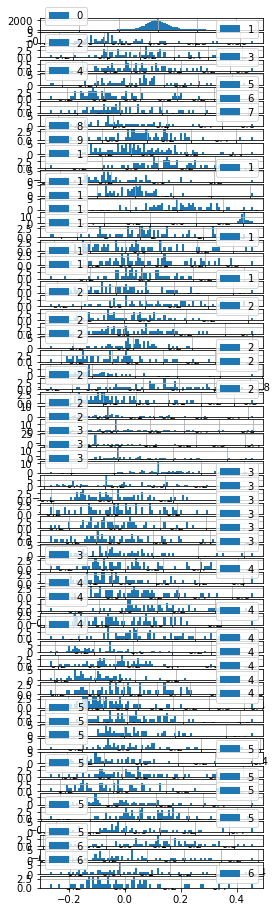

In [15]:
num = len(meanshift_list.unique())
fig,axes = plt.subplots(num,figsize=(4,16))

for i in range(num):

    axes[i].hist(df2.loc(axis=0)[i],bins= 100)
    axes[i].grid()
    axes[i].legend(str(i))
    

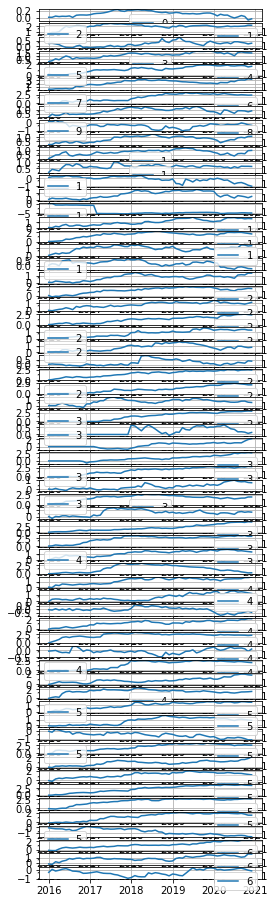

In [16]:
fig,axes = plt.subplots(num,figsize=(4,16))
for i in range(num):    
    axes[i].plot(df2.loc(axis=0)[i].groupby('Date').mean().cumsum())
    axes[i].grid()
    axes[i].legend(str(i))

In [17]:
TP= pd.read_csv('./csv/TOPIX_small1/TOPIX_small1_info.csv')
TP.rename(columns={'コード':'code'},inplace=True)

In [18]:
TP['stocks'] = [str(s)+".T" for s in TP.code]

In [19]:
tp_meanshift = pd.merge(TP,meanshift_list,on='stocks')
tp_meanshift = pd.merge(PE,tp_meanshift,on='stocks') # P/E 40以下 株価収益率の標準値は14から20の間 

In [20]:

for i in range(num):
    print(pd.DataFrame(tp_meanshift[tp_meanshift['label']==i]))

            PE  stocks        日付     銘柄名  code      業種 TOPIXに占める個別銘柄のウェイト  \
0    25.723871  1377.T  20200930  サカタのタネ  1377  水産・農林業              0.03%   
1    43.678073  1379.T  20200930     ホクト  1379  水産・農林業              0.01%   
2    30.246550  1414.T  20200930  ショーボンド  1414     建設業              0.05%   
3    11.797761  1417.T  20200930  ミライトＨＤ  1417     建設業              0.03%   
5     4.045327  1662.T  20200930    石油資源  1662      鉱業              0.01%   
..         ...     ...       ...     ...   ...     ...                ...   
492 -22.743786  9945.T  20200930    プレナス  9945     小売業              0.01%   
493  -7.295947  9946.T  20200930  ミニストップ  9946     小売業              0.00%   
494  18.333099  9948.T  20200930    アークス  9948     小売業              0.02%   
495  22.059760  9956.T  20200930   バローＨＤ  9956     小売業              0.03%   
496  15.680874  9997.T  20200930    ベルーナ  9997     小売業              0.01%   

       ニューインデックス区分  label  
0    TOPIX Small 1      0  
1    TOPIX Small 1 